In [1]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import requests as req
from bs4 import BeautifulSoup 
import json
import seaborn as sns
import  mpl_finance as mpf
import sqlite3

C:\Users\b5031\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
pd.set_option("display.width", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# 用日期查找 "當月" 個股資訊

In [2]:
def craw_stock(stock_number, date):

    url_stocl_info = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date="+ date + "&stockNo="+ stock_number
    r = req.get(url_stocl_info)

    soup = BeautifulSoup(r.text, "html.parser")
    datas = soup.table.find_all("td")

    stock_data = []
    for i in datas:
        stock_data.append(i.text)

    s =[]
    for i in range(0,len(stock_data),9):
       s.append(stock_data[i:i+9])
    
    stock = pd.DataFrame(s, columns = s[0])
    stock = stock.drop(0, axis = 0)
    
    date = []
    for i in stock["日期"]:
        date.append(str(int(i[:3])+1911) + i[3:])
    stock["日期"] = date
    stock= stock.set_index("日期")    
    #stock.index = pd.to_datetime(stock.index, format = "%Y/%m/%d")
    
    stock["成交股數"]= stock["成交股數"].str.replace(",","")
    stock["成交金額"]= stock["成交金額"].str.replace(",","")
    stock["成交筆數"]= stock["成交筆數"].str.replace(",","")
    stock["漲跌價差"]= stock["漲跌價差"].str.replace("X","")
    
    stock.loc[:,['成交股數','成交金額','開盤價','最高價','最低價','收盤價','漲跌價差','成交筆數']] = stock.loc[:,['成交股數','成交金額','開盤價','最高價','最低價','收盤價','漲跌價差','成交筆數']].astype(float) 
        
    return stock

In [3]:
date = input("please key in date: ")
stock_number = input("please key in stock number: ")

stock_data = craw_stock(stock_number, date)
stock_data = stock_data.reset_index()
stock_data

please key in date: 20200601
please key in stock number: 2633


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2020/06/01,13808985.0,530465004.0,38.20,39.00,38.20,38.30,0.60,6115.0
1,2020/06/02,8527262.0,325296486.0,38.40,38.45,38.00,38.15,-0.15,5399.0
2,2020/06/03,9242552.0,354484751.0,38.50,38.65,38.15,38.40,0.25,4474.0
3,2020/06/04,7392603.0,283902065.0,38.60,38.80,38.20,38.40,0.00,3454.0
4,2020/06/05,7368092.0,284170976.0,38.40,38.80,38.25,38.65,0.25,3320.0
5,2020/06/08,12818345.0,496605113.0,38.70,38.90,38.50,38.75,0.10,6942.0
6,2020/06/09,6857832.0,263884094.0,38.75,38.80,38.35,38.50,-0.25,2949.0
7,2020/06/10,5782042.0,223165604.0,38.55,38.75,38.45,38.50,0.00,2967.0
8,2020/06/11,10904535.0,416185237.0,38.50,38.50,37.90,38.00,-0.50,4160.0
9,2020/06/12,10086293.0,377030809.0,37.10,37.70,37.00,37.50,-0.50,4312.0


In [4]:
stock_data["日期"] = pd.to_datetime(stock_data["日期"]).apply(lambda x:x.date())
stock_data = stock_data.set_index("日期")
stock_data

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
日期,,,,,,,,
2020-06-01,13808985.0,530465004.0,38.20,39.00,38.20,38.30,0.60,6115.0
2020-06-02,8527262.0,325296486.0,38.40,38.45,38.00,38.15,-0.15,5399.0
2020-06-03,9242552.0,354484751.0,38.50,38.65,38.15,38.40,0.25,4474.0
2020-06-04,7392603.0,283902065.0,38.60,38.80,38.20,38.40,0.00,3454.0
2020-06-05,7368092.0,284170976.0,38.40,38.80,38.25,38.65,0.25,3320.0
2020-06-08,12818345.0,496605113.0,38.70,38.90,38.50,38.75,0.10,6942.0
2020-06-09,6857832.0,263884094.0,38.75,38.80,38.35,38.50,-0.25,2949.0
2020-06-10,5782042.0,223165604.0,38.55,38.75,38.45,38.50,0.00,2967.0
2020-06-11,10904535.0,416185237.0,38.50,38.50,37.90,38.00,-0.50,4160.0


In [5]:
stock_data = stock_data.reset_index()
stock_data["月份"] = stock_data["日期"].apply(lambda x:x.month)
stock_data["日"] = stock_data["日期"].apply(lambda x:x.day)
stock_data["周"] = stock_data["日期"].apply(lambda x:x.weekday())
stock_data = stock_data.set_index("日期")
stock_data

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,月份,日,周
日期,,,,,,,,,,,
2020-06-01,13808985.0,530465004.0,38.20,39.00,38.20,38.30,0.60,6115.0,6,1,0
2020-06-02,8527262.0,325296486.0,38.40,38.45,38.00,38.15,-0.15,5399.0,6,2,1
2020-06-03,9242552.0,354484751.0,38.50,38.65,38.15,38.40,0.25,4474.0,6,3,2
2020-06-04,7392603.0,283902065.0,38.60,38.80,38.20,38.40,0.00,3454.0,6,4,3
2020-06-05,7368092.0,284170976.0,38.40,38.80,38.25,38.65,0.25,3320.0,6,5,4
2020-06-08,12818345.0,496605113.0,38.70,38.90,38.50,38.75,0.10,6942.0,6,8,0
2020-06-09,6857832.0,263884094.0,38.75,38.80,38.35,38.50,-0.25,2949.0,6,9,1
2020-06-10,5782042.0,223165604.0,38.55,38.75,38.45,38.50,0.00,2967.0,6,10,2
2020-06-11,10904535.0,416185237.0,38.50,38.50,37.90,38.00,-0.50,4160.0,6,11,3


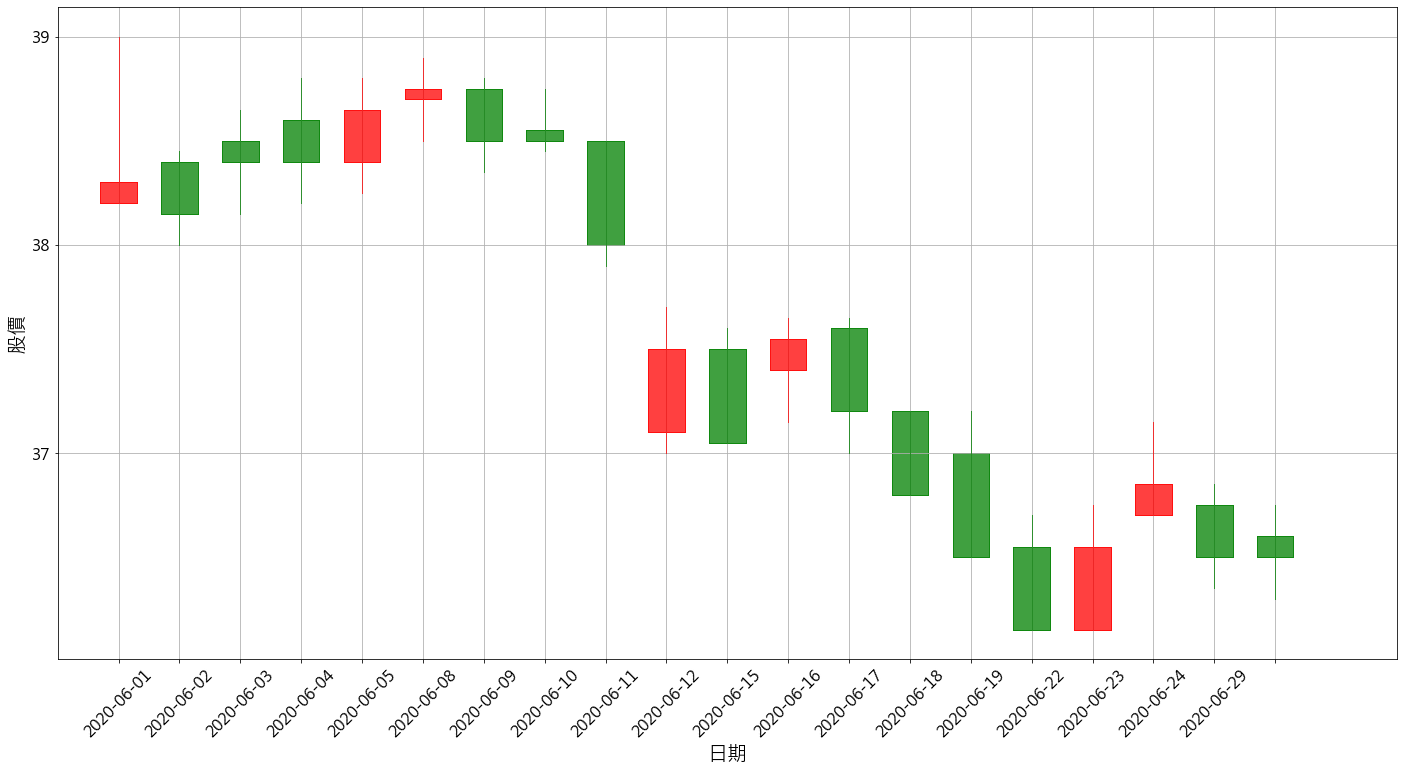

In [6]:
import  mpl_finance as mpf

fig, ax = plt.subplots(1,1, figsize = (24,12))

df = stock_data

ax.set_xlabel("日期", fontsize = 20)
ax.set_xticks(range(0,len(df.index),1))  #設置刻度標籤
ax.set_xticklabels(df.index[:-1], rotation = 45, fontsize = 16)  #用字串列表來設定 xticks 標籤

#ax.set_ylim(20,40) #設置座標軸範圍
ax.set_ylabel("股價", fontsize = 20)
ax.set_yticks(np.arange(20,40))
ax.set_yticklabels(np.arange(20,40), fontsize = 16)

#ax.tick_params(axis='y', labelsize= 14) 
plt.grid(True)

mpf.candlestick2_ochl(ax, df["開盤價"], df["收盤價"], df["最高價"], df["最低價"], width= 0.6, colorup="r", colordown="g", alpha=0.75)

plt.show()

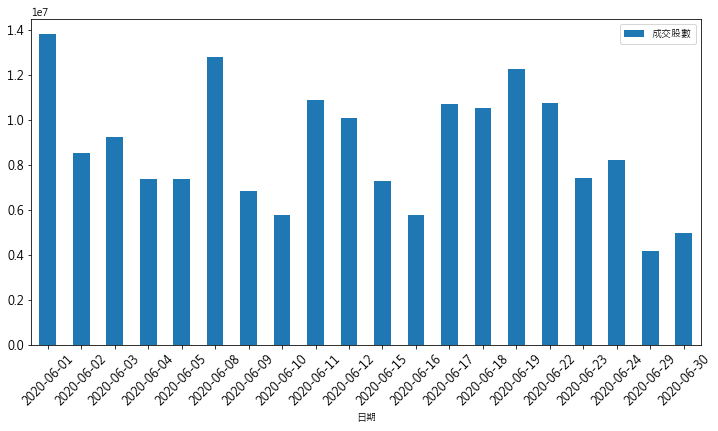

In [7]:
stock_data.loc[:,["成交股數"]].plot(kind = "bar", figsize = (12,6))
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

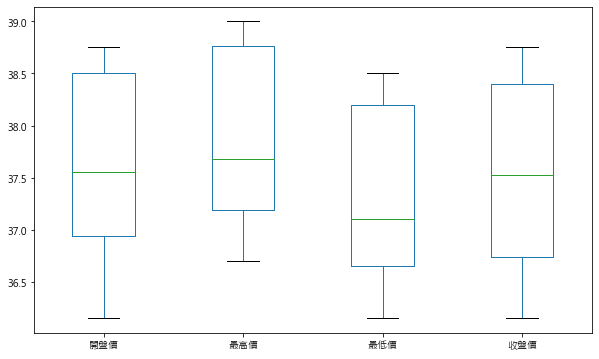

In [8]:
stock_data.loc[:,["開盤價","最高價","最低價","收盤價"]].plot(kind = "box",figsize =(10,6))

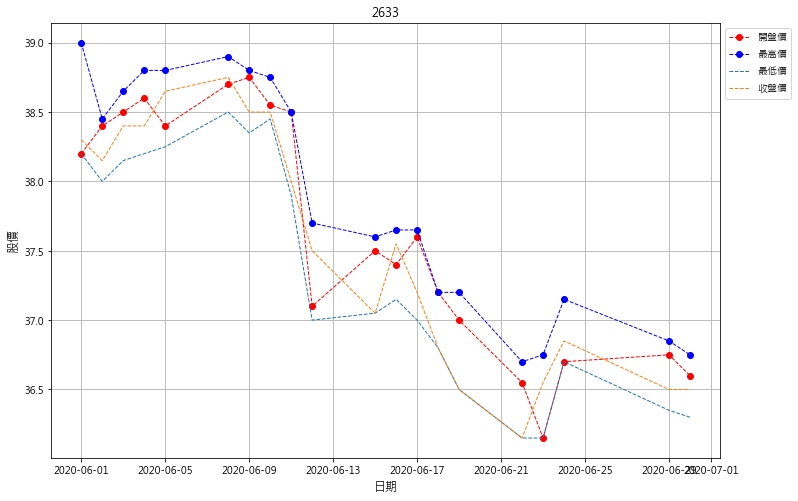

In [11]:
plt.figure(figsize = (12,8))
plt.plot(stock_data.loc[:,["開盤價"]], ls= "--", marker = "o", color = "red", linewidth= 1, label = "開盤價")
plt.plot(stock_data.loc[:,["最高價"]],"b--o", linewidth= 1, label = "最高價")
plt.plot(stock_data.loc[:,["最低價"]], linewidth= 1, label = "最低價", ls = "--")
plt.plot(stock_data.loc[:,["收盤價"]], linewidth= 1, label = "收盤價", ls = "--")


plt.xlabel("日期", fontsize = 12)
plt.ylabel("股價", fontsize = 12)
plt.title(stock_number)
plt.legend(bbox_to_anchor = (1,1), loc = "upper left")
plt.grid(True)
plt.show()

# 用顏色來區分漲幅或跌幅

In [12]:
#改變顯示顏色
def displaycolor(value):
    if value > 0:
        color = "red"
    elif value < 0:
        color = "green"
    else:
        color = "black"
    return "color: {}".format(color)

In [13]:
display_stock = stock_data.copy()
display_stock = display_stock.style.applymap(displaycolor, subset = ["漲跌價差"])
display_stock

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,月份,日,周
日期,,,,,,,,,,,
2020-06-01,1.3809e+07,5.30465e+08,38.2,39,38.2,38.3,0.6,6115,6,1,0
2020-06-02,8.52726e+06,3.25296e+08,38.4,38.45,38,38.15,-0.15,5399,6,2,1
2020-06-03,9.24255e+06,3.54485e+08,38.5,38.65,38.15,38.4,0.25,4474,6,3,2
2020-06-04,7.3926e+06,2.83902e+08,38.6,38.8,38.2,38.4,0,3454,6,4,3
2020-06-05,7.36809e+06,2.84171e+08,38.4,38.8,38.25,38.65,0.25,3320,6,5,4
2020-06-08,1.28183e+07,4.96605e+08,38.7,38.9,38.5,38.75,0.1,6942,6,8,0
2020-06-09,6.85783e+06,2.63884e+08,38.75,38.8,38.35,38.5,-0.25,2949,6,9,1
2020-06-10,5.78204e+06,2.23166e+08,38.55,38.75,38.45,38.5,0,2967,6,10,2
2020-06-11,1.09045e+07,4.16185e+08,38.5,38.5,37.9,38,-0.5,4160,6,11,3


# 用read_html的方式直接讀取

In [ ]:
pd.read_html("https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20200101&stockNo=2884")[0]

# 顯示設定年份 "累計至當月為止" 的個股的資訊

In [14]:
def find_year_month_info(year, month, stock_num):
    
    months =[]
    
    if month >1:
        for i in range(2,int(month)+1):
            if i < 10:
                months.append(str(year) + "0" + str(i) + "01")
            else:
                months.append(str(year) + str(i) + "01")
                
        first_month_info = craw_stock(str(stock_num), str(year)+"0101")
    
        for month in months:
            each_month_info = craw_stock(str(stock_num), month)
            data = pd.concat([first_month_info,each_month_info], axis = 0)
            first_month_info = data      
            
        yearly_data = data
        
    else:
        month = str(year) + "0101"
        yearly_data = craw_stock(str(stock_num), month)
    
    return yearly_data

In [15]:
year = int(input("please key in a year: "))
month = int(input("please key in a month: "))
stock_num = int(input("please key in a stock number: "))


yearly_stock_info = find_year_month_info(year,month,stock_num)
yearly_stock_info.head()

please key in a year: 2019
please key in a month: 12
please key in a stock number: 2633


,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
日期,,,,,,,,
2019/01/02,3913581.0,118652439.0,30.70,30.7,30.05,30.20,-0.35,1938.0
2019/01/03,5321204.0,160176308.0,30.05,30.3,29.85,30.20,0.00,2109.0
2019/01/04,6817987.0,206411994.0,30.00,30.5,29.85,30.40,0.20,2168.0
2019/01/07,4632630.0,142033000.0,30.60,30.8,30.55,30.65,0.25,2056.0
2019/01/08,3062509.0,93521715.0,30.65,30.7,30.45,30.50,-0.15,1632.0


In [16]:
yearly_stock_info.style.applymap(displaycolor, subset = ["漲跌價差"])

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
日期,,,,,,,,
2019/01/02,3.91358e+06,1.18652e+08,30.7,30.7,30.05,30.2,-0.35,1938
2019/01/03,5.3212e+06,1.60176e+08,30.05,30.3,29.85,30.2,0,2109
2019/01/04,6.81799e+06,2.06412e+08,30,30.5,29.85,30.4,0.2,2168
2019/01/07,4.63263e+06,1.42033e+08,30.6,30.8,30.55,30.65,0.25,2056
2019/01/08,3.06251e+06,9.35217e+07,30.65,30.7,30.45,30.5,-0.15,1632
2019/01/09,7.71393e+06,2.37349e+08,30.55,30.9,30.5,30.8,0.3,2884
2019/01/10,3.79884e+06,1.16962e+08,30.8,30.85,30.6,30.85,0.05,1807
2019/01/11,4.22101e+06,1.29952e+08,30.85,30.85,30.7,30.75,-0.1,1742
2019/01/14,4.83297e+06,1.48154e+08,30.75,30.8,30.6,30.65,-0.1,1949


In [17]:
week = yearly_stock_info["收盤價"].rolling(window=5).mean()
month = yearly_stock_info["收盤價"].rolling(window=10).mean()
season = yearly_stock_info["收盤價"].rolling(window=20).mean()

yearly_stock_info["5日平均(收盤)"] = week
yearly_stock_info["10日平均(收盤)"] = month
yearly_stock_info["20日平均(收盤)"] = season

yearly_stock_info

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,5日平均(收盤),10日平均(收盤),20日平均(收盤)
日期,,,,,,,,,,,
2019/01/02,3913581.0,118652439.0,30.70,30.70,30.05,30.20,-0.35,1938.0,NaN,NaN,NaN
2019/01/03,5321204.0,160176308.0,30.05,30.30,29.85,30.20,0.00,2109.0,NaN,NaN,NaN
2019/01/04,6817987.0,206411994.0,30.00,30.50,29.85,30.40,0.20,2168.0,NaN,NaN,NaN
2019/01/07,4632630.0,142033000.0,30.60,30.80,30.55,30.65,0.25,2056.0,NaN,NaN,NaN
2019/01/08,3062509.0,93521715.0,30.65,30.70,30.45,30.50,-0.15,1632.0,30.39,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019/12/25,7852699.0,306167322.0,39.20,39.60,38.65,38.80,-0.40,4804.0,38.43,37.340,36.6150
2019/12/26,6271766.0,241820257.0,38.85,39.15,38.25,38.45,-0.35,3536.0,38.86,37.555,36.7275
2019/12/27,5477799.0,210769027.0,38.65,38.75,38.35,38.60,0.15,2741.0,38.95,37.805,36.8600


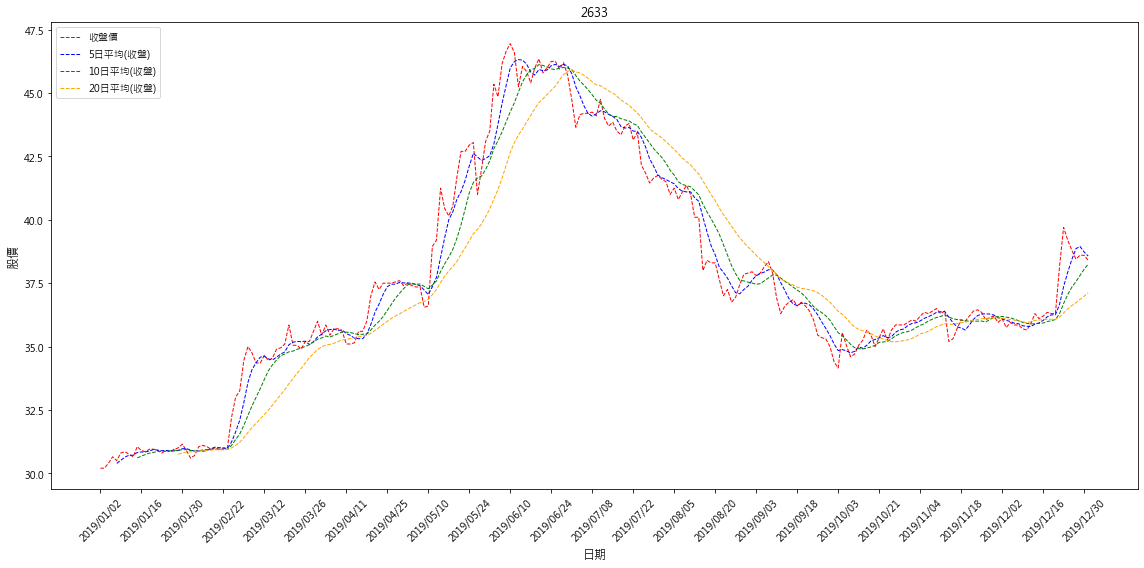

In [18]:
plt.figure(figsize = (16,8))
plt.plot(yearly_stock_info.loc[:,["收盤價"]], "r--", linewidth= 1, label = "收盤價")
plt.plot(yearly_stock_info.loc[:,["5日平均(收盤)"]],"b--", linewidth= 1, label = "5日平均(收盤)")
plt.plot(yearly_stock_info.loc[:,["10日平均(收盤)"]], ls = "--", color = "green", linewidth= 1, label = "10日平均(收盤)")
plt.plot(yearly_stock_info.loc[:,["20日平均(收盤)"]], ls = "--", color = "orange", linewidth= 1, label = "20日平均(收盤)")

plt.xticks(yearly_stock_info.index[:-1:10], rotation = 45)

plt.xlabel("日期", fontsize = 12)
plt.ylabel("股價", fontsize = 12)

plt.title(stock_number)
#plt.legend(bbox_to_anchor = (1,1), loc = "upper left")
plt.legend(loc = "upper left")

plt.tight_layout()
plt.show()


In [19]:
yearly_stock_info = yearly_stock_info.reset_index()

yearly_stock_info["日期"] = pd.to_datetime(yearly_stock_info["日期"]).apply(lambda x:x.date())
                            
df = yearly_stock_info.loc[:,["日期",'成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']]
df.columns = ['date','capacity', 'turnover', 'open', 'high', 'low', 'close', 'change','transaction']
df.head()

,date,capacity,turnover,open,high,low,close,change,transaction
0,2019-01-02,3913581.0,118652439.0,30.70,30.7,30.05,30.20,-0.35,1938.0
1,2019-01-03,5321204.0,160176308.0,30.05,30.3,29.85,30.20,0.00,2109.0
2,2019-01-04,6817987.0,206411994.0,30.00,30.5,29.85,30.40,0.20,2168.0
3,2019-01-07,4632630.0,142033000.0,30.60,30.8,30.55,30.65,0.25,2056.0
4,2019-01-08,3062509.0,93521715.0,30.65,30.7,30.45,30.50,-0.15,1632.0


# ==========存入SQL==========

In [20]:
import sqlite3

conn = sqlite3.connect("C:/Users/b5031/pandas/stock_info.sqlite")
c = conn.cursor()

cmd = "CREATE TABLE stock_info (date DATE PRIMARY KEY, capacity INT VARCHAR(10),turnover INT VARCHAR(15),open REAL VARCHAR(6),high REAL VARCHAR(6),low REAL VARCHAR(6),close REAL VARCHAR(6),change REAL VARCHAR(6),transaction_amount INT VARCHAR(8))"
c.execute(cmd)

conn.commit()
conn.close()

In [21]:
year = int(input("please key in a year: "))
month = int(input("please key in a month: "))
stock_num = int(input("please key in a stock number: "))


def data_to_sql(year,month,stock_num):
    
    yearly_stock_info = find_year_month_info(year,month,stock_num)
    
    yearly_stock_info = yearly_stock_info.reset_index()
    yearly_stock_info["日期"] = pd.to_datetime(yearly_stock_info["日期"]).apply(lambda x:x.date())
    
    df = yearly_stock_info
    df.columns = ['date','capacity', 'turnover', 'open', 'high', 'low', 'close', 'change','transaction']
    
    conn = sqlite3.connect("C:/Users/b5031/pandas/stock_info.sqlite")
    c = conn.cursor()
    
    for i in range(len(df)):
        cmd = "INSERT OR REPLACE INTO stock_info VALUES ('{}','{}','{}','{}','{}','{}','{}','{}','{}')".format(df.iloc[i,:][0], df.iloc[i,:][1], df.iloc[i,:][2], df.iloc[i,:][3], df.iloc[i,:][4], df.iloc[i,:][5], df.iloc[i,:][6], df.iloc[i,:][7], df.iloc[i,:][8])
        c.execute(cmd)
        conn.commit()

    conn.close()
    
data_to_sql(year,month,stock_num)

please key in a year: 2019
please key in a month: 12
please key in a stock number: 2633


In [22]:
conn= sqlite3.connect("C:/Users/b5031/pandas/stock_info.sqlite")
c = conn.cursor()

cmd = "SELECT * FROM stock_info WHERE date BETWEEN '2019-06-30' AND '2019-12-31' ORDER BY date ASC"
c.execute(cmd)
conn.commit()

df = pd.DataFrame(c.fetchall(), columns = ['date','capacity', 'turnover', 'open', 'high', 'low', 'close', 'change','transaction'])

conn.close()
df.head()

,date,capacity,turnover,open,high,low,close,change,transaction
0,2019-07-01,16184990,725370561,45.5,45.6,44.45,44.75,-0.95,7046
1,2019-07-02,20217392,885597592,44.1,44.65,43.3,43.65,-1.1,9471
2,2019-07-03,9299384,412171596,43.75,44.65,43.75,44.15,0.5,4357
3,2019-07-04,2750802,121760569,44.2,44.55,44.15,44.2,0.05,1585
4,2019-07-05,2032919,89651797,44.25,44.35,43.9,44.2,0.0,1183


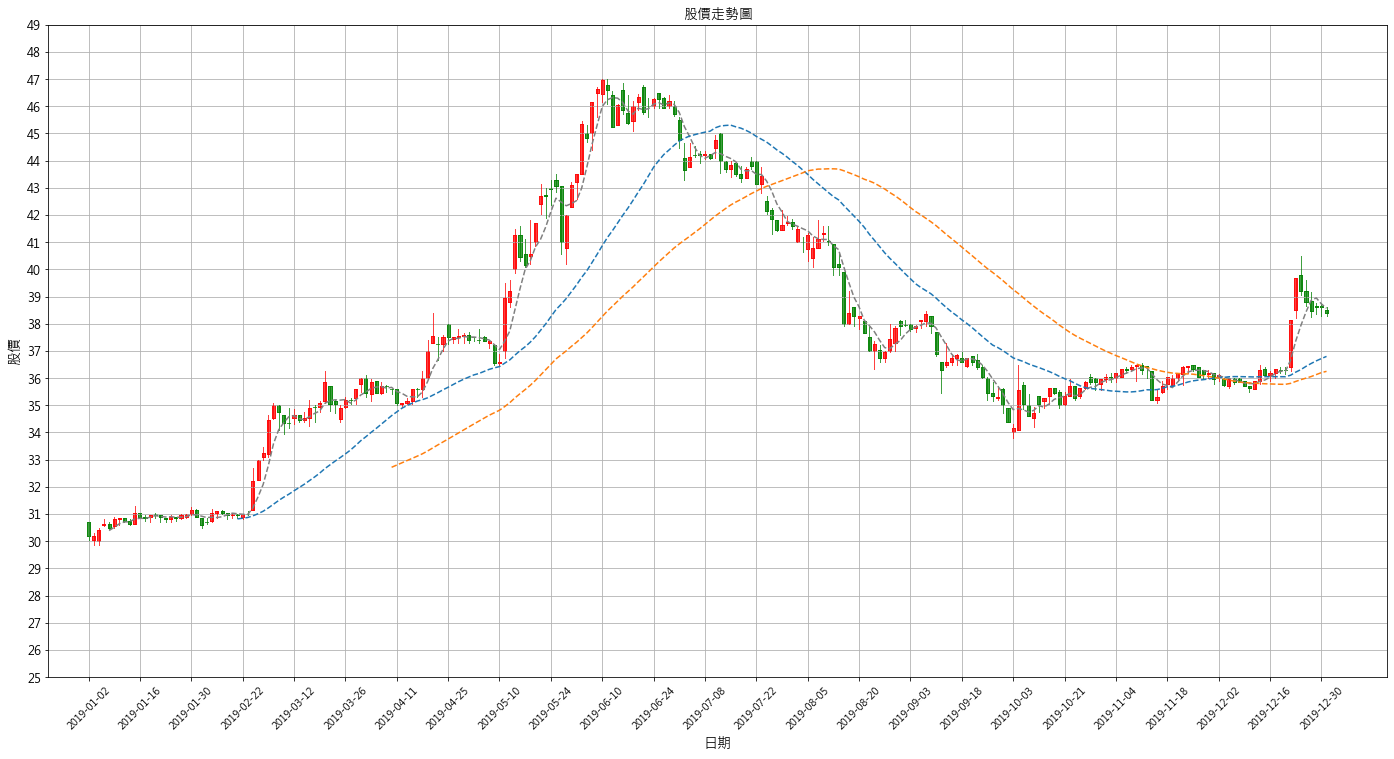

In [25]:
from talib import abstract 

conn= sqlite3.connect("C:/Users/b5031/pandas/stock_info.sqlite")
c = conn.cursor()

cmd = "SELECT * FROM stock_info WHERE date BETWEEN '2019-01-01' AND '2019-12-31' ORDER BY date ASC"
c.execute(cmd)
conn.commit()

df = pd.DataFrame(c.fetchall(), columns = ['date','capacity', 'turnover', 'open', 'high', 'low', 'close', 'change','transaction'])
df = df.set_index("date")

sma_5 = abstract.SMA(df,5)  
sma_30 = abstract.SMA(df,30)
sma_60 = abstract.SMA(df,60)

fig, ax = plt.subplots(1,1, figsize = (24,12))

mpf.candlestick2_ochl(ax, df["open"], df["close"], df["high"], df["low"], width=0.6, colorup="r", colordown="g", alpha=0.75)


ax.plot(sma_5, color = "gray", ls = "--")
ax.plot(sma_30, ls = "--")
ax.plot(sma_60, ls = "--")


ax.set_xticks(range(0, len(df.index),10))
ax.set_xticklabels(df.index[:-1:10],rotation=45)
ax.set_xlabel("日期", fontsize = 14)

#ax.set_ylim(20,40)
ax.set_yticks(np.arange(25,50))
ax.set_yticklabels(np.arange(25,50))
ax.set_ylabel("股價", fontsize = 14)

ax.tick_params(axis="y", labelsize= 12)
ax.set_title("股價走勢圖", fontsize = 14)
ax.grid(True)

conn.close()

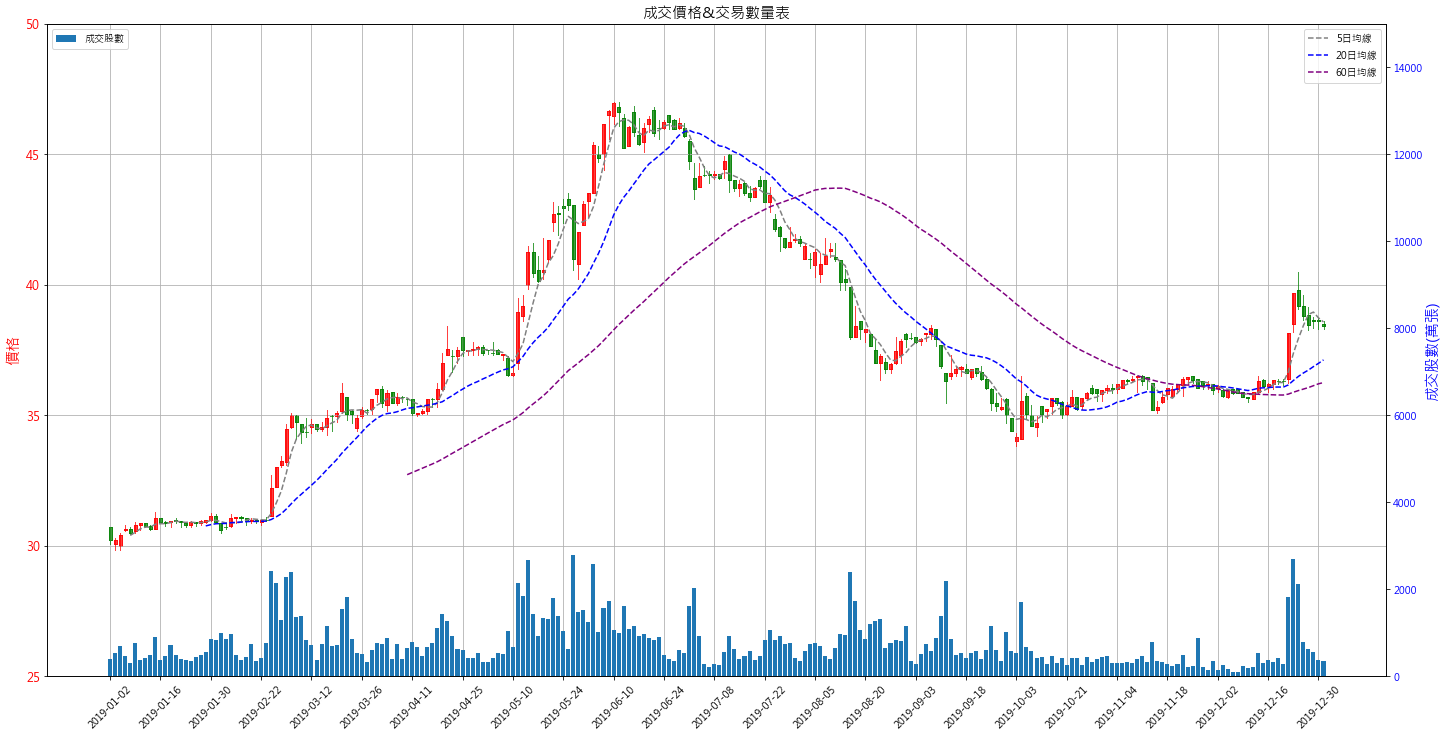

In [26]:
#from matplotlib.dates import WeekdayLocator, DateFormatter, MonthLocator


fig,ax1 = plt.subplots(1,1, figsize = (24,12))

ax2 = ax1.twinx()

mpf.candlestick2_ochl(ax1, df["open"], df["close"], df["high"], df["low"], width=0.6, colorup="r", colordown="g", alpha=0.75)

ax1.set_xticks(range(0, len(df.index),10))
ax1.set_xticklabels(df.index[::10],rotation=45)

ax1.set_ylabel("價格", color = "red", fontsize =15)
ax1.tick_params(axis = "y", labelcolor = "red", labelsize =12)
ax1.set_ylim([25,50])

sma_5 = abstract.SMA(df,5)  
sma_20 = abstract.SMA(df,20)
sma_60 = abstract.SMA(df,60)


ax1.plot(sma_5, color = "gray", ls = "--")
ax1.plot(sma_20, color = "blue", ls = "--")
ax1.plot(sma_60, color = "purple", ls = "--")
ax1.legend(["5日均線","20日均線", "60日均線"], loc = "upper right")
ax1.grid(True)

ax2.bar(df.index, df.loc[:,"capacity"]/10000, label = ["成交股數"])

ax2.set_xticks(range(0, len(df.index),10))
ax2.set_xticklabels(df.index[::10], rotation=45)

ax2.set_ylabel("成交股數(萬張)", color = "blue", fontsize =15)
ax2.set_ylim([0,15000])
ax2.tick_params(axis = "y", labelcolor = "blue")
ax2.legend(["成交股數"], loc = "upper left")


plt.title("成交價格&交易數量表", fontsize = 15)
plt.show()
#weekday_locator = WeekdayLocator(byweekday =(0), interval = 1)  #byweekday = (0) ==>禮拜一為基準
#ax2.xaxis.set_minor_locator(weekday_locator)
#ax2.xaxis.set_minor_formatter(DateFormatter("%d\n%a"))
#ax2.xaxis.grid(True, "minor")  #增加格線

#ax2.xaxis.set_major_locator(MonthLocator())
#ax2.xaxis.set_major_formatter(DateFormatter("\n\n\n%b\n%Y"))


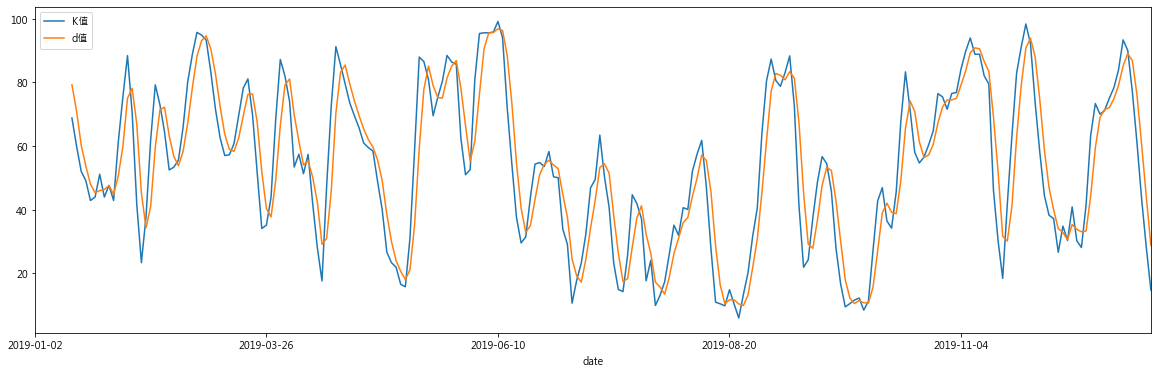

In [27]:
#KD值
abstract.STOCH(df).plot(figsize = (20,6))
plt.legend(["K值", "d值"])

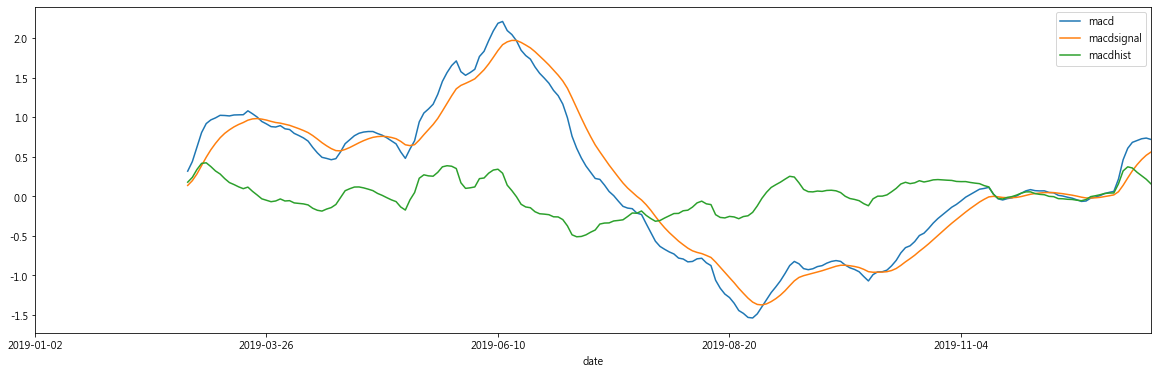

In [28]:
#MACD值
abstract.MACD(df).plot(figsize = (20,6))

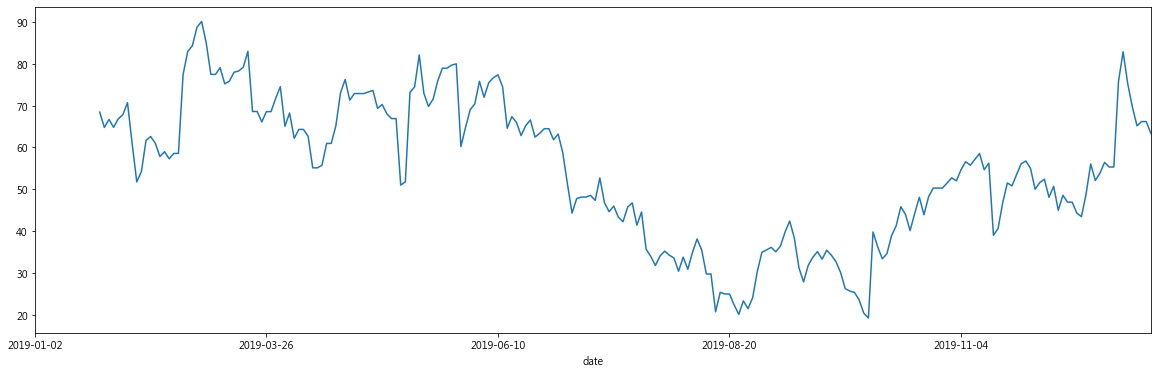

In [29]:
#RSI值
abstract.RSI(df).plot(figsize = (20,6))

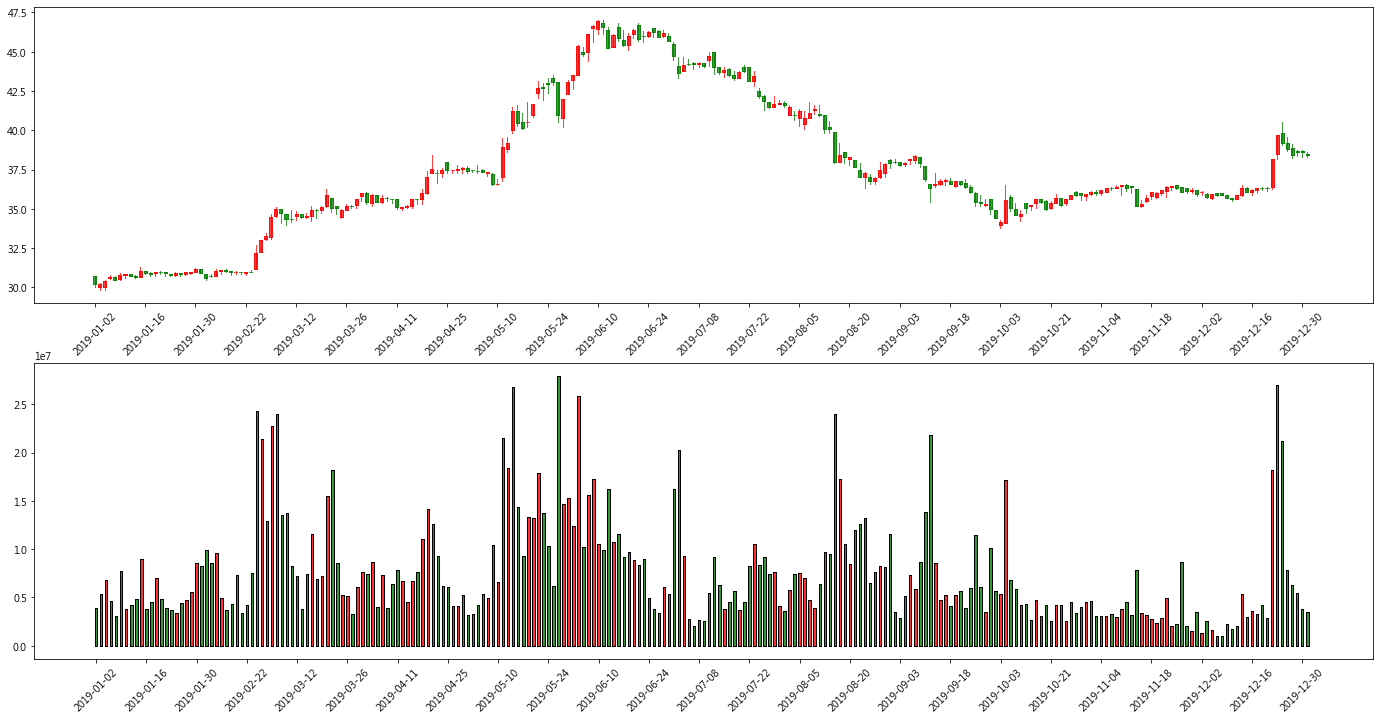

In [30]:
fig,axes = plt.subplots(2,1, figsize = (24,12))

mpf.candlestick2_ochl(axes[0], df["open"], df["close"], df["high"], df["low"], width=0.6, colorup="r", colordown="g", alpha=0.75)

axes[0].set_xticks(range(0, len(df.index), 10))
axes[0].set_xticklabels(df.index[::10], rotation = 45)

mpf.volume_overlay(axes[1], df["open"], df["close"], df["capacity"], colorup="r", colordown="g", width=0.5, alpha=0.8)

axes[1].set_xticks(range(0, len(df.index), 10))
axes[1].set_xticklabels(df.index[::10], rotation = 45)

plt.show()

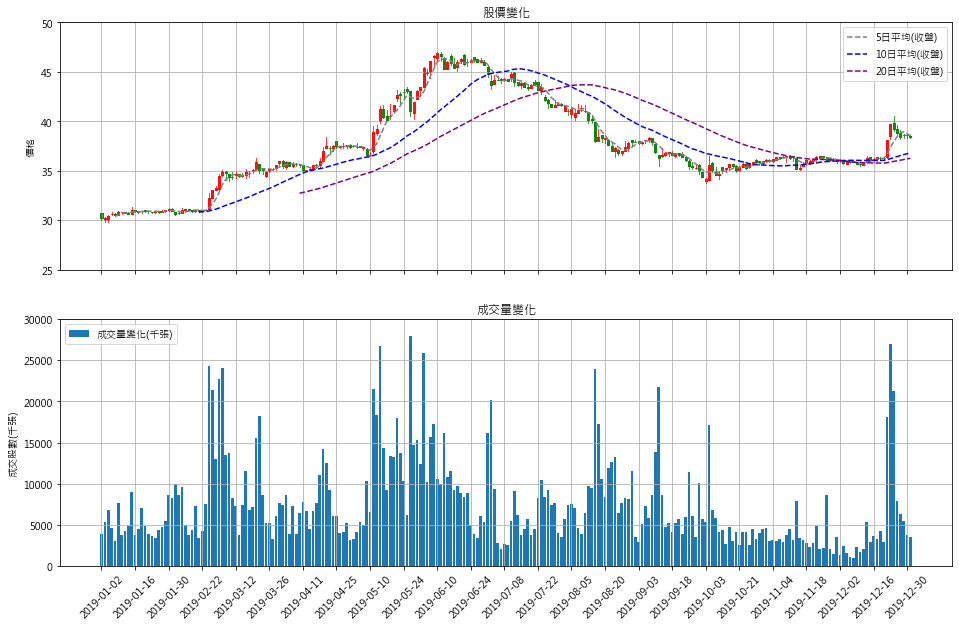

In [31]:
#plt.style.use("seaborn-whitegrid")
#sns.set(font = "Microsoft JhengHei")

conn= sqlite3.connect("C:/Users/b5031/pandas/stock_info.sqlite")
c = conn.cursor()

cmd = "SELECT * FROM stock_info WHERE date BETWEEN '2019-01-01' AND '2019-12-31'ORDER BY date ASC"
c.execute(cmd)
conn.commit()

df = pd.DataFrame(c.fetchall(), columns = ['date','capacity', 'turnover', 'open', 'high', 'low', 'close', 'change','transaction'])
df = df.set_index("date")

fig, axes, = plt.subplots(2,1, sharex = True ,sharey=False,figsize = (16,10))

sma_5 = abstract.SMA(df,5)  
sma_30 = abstract.SMA(df,30)
sma_60 = abstract.SMA(df,60)

mpf.candlestick2_ochl(axes[0], df["open"], df["close"], df["high"], df["low"], width=0.6, colorup="r", colordown="g", alpha=0.75)

axes[0].set_xticks(range(0, len(df.index),20))
axes[0].set_xticklabels(df.index[::20],rotation=45)

axes[0].plot(sma_5, color = "gray", ls = "--")
axes[0].plot(sma_30, color = "blue", ls = "--")
axes[0].plot(sma_60, color = "purple", ls = "--")

axes[0].set_ylabel("價格")
axes[0].legend(["5日平均(收盤)", "10日平均(收盤)", "20日平均(收盤)"], loc = "best")
axes[0].set_ylim([25,50])
axes[0].set_title("股價變化")
axes[0].grid(True)

axes[1].bar(df.index, df.loc[:,"capacity"]/1000)

axes[1].set_ylim([0,30000])
axes[1].set_ylabel("成交股數(千張)")

axes[1].set_xticks(range(0, len(df.index),10))
axes[1].set_xticklabels(df.index[::10], rotation=45)

axes[1].legend(["成交量變化(千張)"], loc = "best")
axes[1].set_title("成交量變化")
axes[1].grid(True)

# ==========使用plotly==========

In [32]:
import plotly.express as px
import plotly.graph_objects as go

In [33]:
df_stock = df.copy()

avg_rolling_5 = df_stock["close"].rolling(window=5).mean()
avg_rolling_10 = df_stock["close"].rolling(window=10).mean()
avg_rolling_20 = df_stock["close"].rolling(window=20).mean()

df_stock["avg_rolling_5"] = avg_rolling_5
df_stock["avg_rolling_10"] = avg_rolling_10
df_stock["avg_rolling_20"] = avg_rolling_20

df_stock = df_stock.reset_index()
df_stock

,date,capacity,turnover,open,high,low,close,change,transaction,avg_rolling_5,avg_rolling_10,avg_rolling_20
0,2019-01-02,3913581,118652439,30.7,30.7,30.05,30.2,-0.35,1938,NaN,NaN,NaN
1,2019-01-03,5321204,160176308,30.05,30.3,29.85,30.2,0.0,2109,NaN,NaN,NaN
2,2019-01-04,6817987,206411994,30.0,30.5,29.85,30.4,0.2,2168,NaN,NaN,NaN
3,2019-01-07,4632630,142033000,30.6,30.8,30.55,30.65,0.25,2056,NaN,NaN,NaN
4,2019-01-08,3062509,93521715,30.65,30.7,30.45,30.5,-0.15,1632,30.39,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
237,2019-12-25,7852699,306167322,39.2,39.6,38.65,38.8,-0.4,4804,38.43,37.340,36.6150
238,2019-12-26,6271766,241820257,38.85,39.15,38.25,38.45,-0.35,3536,38.86,37.555,36.7275
239,2019-12-27,5477799,210769027,38.65,38.75,38.35,38.6,0.15,2741,38.95,37.805,36.8600
240,2019-12-30,3746765,144248264,38.65,38.75,38.3,38.6,0.0,2134,38.73,38.045,36.9850


In [41]:
fig = px.line(df_stock, x="date", y="close", title="收盤價變化")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [48]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_stock["date"], y=df_stock["open"], name="open", line = dict(color = "red", width = 1, dash = "dot")))
fig.add_trace(go.Scatter(x=df_stock["date"], y=df_stock["open"], name="close", line = dict(color = "green", width = 1, dash = "dot")))
fig.add_trace(go.Scatter(x=df_stock["date"], y=df_stock["high"], name="high", line = dict(color = "orange", width = 1, dash = "dot")))
fig.add_trace(go.Scatter(x=df_stock["date"], y=df_stock["low"], name="low", line = dict(color = "blue", width = 1, dash = "dot")))

fig.update_layout(xaxis_title= "日期" ,yaxis_title="股價", title = "股價變化圖")
fig.show()


fig1 = go.Figure([go.Bar(x=df_stock["date"], y=df_stock["capacity"])])
fig1.update_layout(xaxis_title= "日期" ,yaxis_title="交易量", title = "交易量變化圖")
fig1.show()


In [40]:
fig = go.Figure()
fig = go.Figure(data=[go.Candlestick(x=df_stock["date"], open=df_stock["open"], high=df_stock["high"], low=df_stock["low"], close=df_stock["close"])])
fig.update_layout(xaxis_title= "日期" ,yaxis_title="股價", title = "股價變化圖")

fig.show()